## Lecture 05

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the true position is $\mu = 1$ (in suitable units) and the erorrs are $\sigma=0.2$

In [1]:
from astroML.datasets import fetch_dr7_quasar
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

plt.rcParams['figure.figsize']=(8,5) 
plt.rcParams['font.size']=16 
plt.rcParams['font.family']='Liberation Serif' 
plt.rcParams['figure.autolayout']=True 
plt.rcParams['mathtext.fontset'] = 'cm'

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 
- Compare it with the MLE estimator derived above


Text(0.5, 0, 'Position')

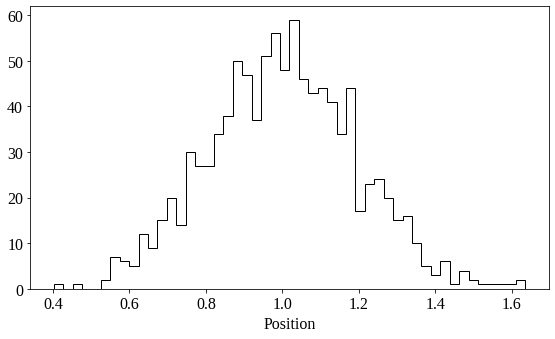

In [56]:
#true parameters
mu_true = 1
sigma = 0.2
#number of measures
N = 1000

#generate the measures according to a homoscedastic distribution
x = np.random.normal(mu_true, sigma, N)

#draw
nbins = 50
plt.hist(x, bins=nbins, histtype='step', color='black');
plt.xlabel('Position')

Probability of each measured position
$$p(x_i|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right).$$

Numerical maximum likelihood estimate: 1.0030030030030028
Analytical maximum likelihood estimate: 1.0042456741183285


(1e-172, 1e+100)

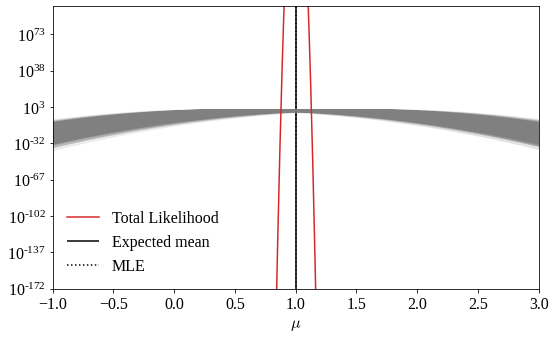

In [99]:
#single measure distribution
def pdf(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x - mu)**2/(2*sigma**2))

#possible values of mu
mu_v = np.linspace(-2, 4, N)

#likelihood
L_tot = np.ones(len(mu_v))
for n in x:
    #draw sigle measures distributions
    plt.plot(mu_v, pdf(n, mu_v, sigma), color='grey', alpha=0.1)
    #evaluate the likelihood as the product
    L_tot *= pdf(n, mu_v, sigma)

#MLE of the mean
mu_MLE = mu_v[int(np.argmax(L_tot))]

print('Numerical maximum likelihood estimate:', mu_v[int(np.argmax(L_tot))])
print('Analytical maximum likelihood estimate:',np.mean(x))

#draw
plt.plot(mu_v, L_tot, color='tab:red', label='Total Likelihood')
plt.yscale('log')
plt.vlines(mu_true, ymin=np.min(L_tot), ymax=np.max(L_tot), color='black', label='Expected mean')
plt.vlines(mu_MLE, ymin=np.min(L_tot), ymax=np.max(L_tot), linestyle=':', color='black', label='MLE')
plt.legend(frameon=False, loc='lower left')
plt.xlabel(r'$\mu$')
plt.xlim([-1, 3])
plt.ylim([1e-172, 1e100])

In [86]:
N_range = np.logspace(0, 3.5, 100)
MLE, mean = [], []
for n in N_range:
    L_tot = np.ones(len(mu_v))
    x = np.random.normal(mu_true, sigma, int(n))
    for y in x:
        L_tot *= pdf(y, mu_v, sigma)

    MLE.append(mu_v[int(np.argmax(L_tot))])
    mean.append(np.mean(x))

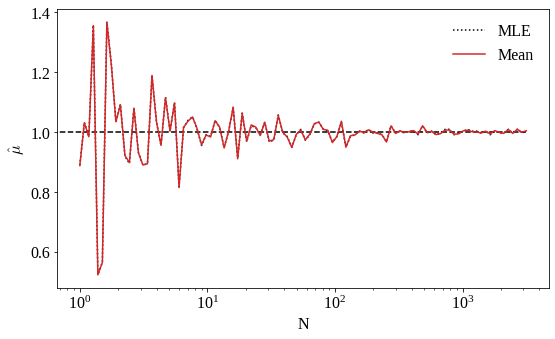

In [101]:
plt.plot(N_range, MLE, c='k', linestyle=':', label='MLE')
plt.plot(N_range, mean, c='tab:red', label='Mean')
plt.hlines(y=mu_true, xmin = 0, xmax=10**(3.5), color='k', linestyle='--')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('$\hat{\mu}$')
plt.legend(frameon=False)

### Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

Numerical maximum likelihood error: 0.006318230765016282
Analytical maximum likelihood error: 0.006324555320336759


<ipython-input-9-d3515af218e7>:2: RuntimeWarning: divide by zero encountered in log
  diff = np.diff(np.log(L_tot), 2)                     #delta logL^2
/home/irene/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:1292: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


(1e-172, 10000000000.0)

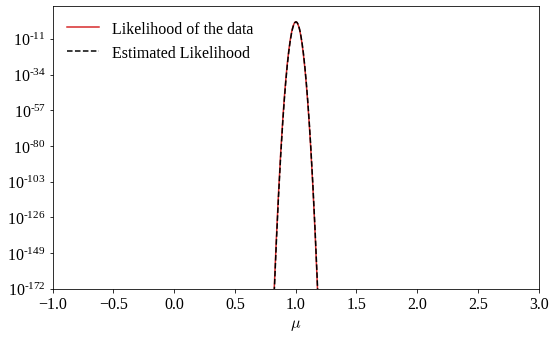

In [9]:
#second order differentiation
diff = np.diff(np.log(L_tot), 2)                     #delta logL^2
norm = ((np.max(mu_v)-np.min(mu_v))/len(mu_v))**2    #delta theta^2

#sigma estimate
sigma_est = (-diff[np.argmax(L_tot)]/norm)**(-1/2)
print('Numerical maximum likelihood error:',sigma_est)
print('Analytical maximum likelihood error:',sigma/np.sqrt(N))

#draw
plt.plot(mu_v, L_tot/np.max(L_tot), color='tab:red', label= 'Likelihood of the data')
plt.plot(mu_v, pdf(mu_v, mu_v[int(np.argmax(L_tot))], sigma_est)/np.max(pdf(mu_v, mu_v[int(np.argmax(L_tot))], sigma_est)), color='black', label='Estimated Likelihood', linestyle='--')
plt.yscale('log')
plt.legend(frameon=False, loc='upper left')
plt.xlabel(r'$\mu$')
plt.xlim([-1, 3])
plt.ylim([1e-172, 1e10])

### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

In [47]:
#generate N values of the error sigma_i
sigma_v = np.random.normal(0.2, 0.05, N)

Numerical maximum likelihood estimate: 0.9909909909909911
Analytical maximum likelihood estimate: 0.9921907914305458


(1e-172, 1e+30)

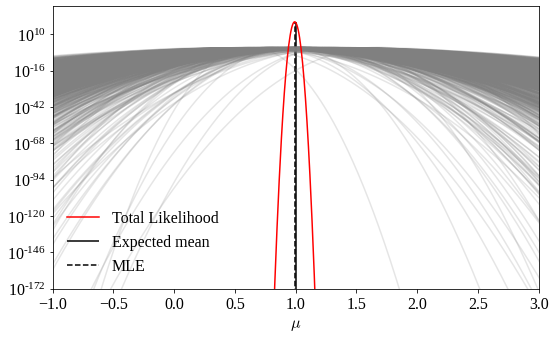

In [50]:
#evaluate the total likelihood
L_tot = np.ones(len(mu_v))
for n,s in zip(x, sigma_v):
    plt.plot(mu_v, L(n, mu_v, s), c='grey', alpha=0.2)
    L_tot *= L(n, mu_v, s)

print('Numerical maximum likelihood estimate:', mu_v[int(np.argmax(L_tot))])
print('Analytical maximum likelihood estimate:',np.sum(x/sigma_v**2)/np.sum(sigma_v**-2))

#draw
plt.plot(mu_v, L_tot, color='tab:red', label='Total Likelihood')
plt.yscale('log')
plt.vlines(mu, ymin=np.min(L_tot), ymax=np.max(L_tot), color='black', label='Expected mean')
plt.vlines(mu_v[int(np.argmax(L_tot))], ymin=np.min(L_tot), ymax=np.max(L_tot), linestyle='--', color='black', label='MLE')
plt.legend(frameon=False, loc='lower left')
plt.xlabel(r'$\mu$')
plt.xlim([-1, 3])
plt.ylim([1e-172, 1e30])

Numerical maximum likelihood error: 0.005570600957291623
Analytical maximum likelihood error: 0.005576177134425799


<ipython-input-52-ccf468f2ea7e>:2: RuntimeWarning: divide by zero encountered in log
  diff = np.diff(np.log(L_tot), 2)                     #delta logL^2
/home/irene/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:1292: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


(1e-172, 10000000000.0)

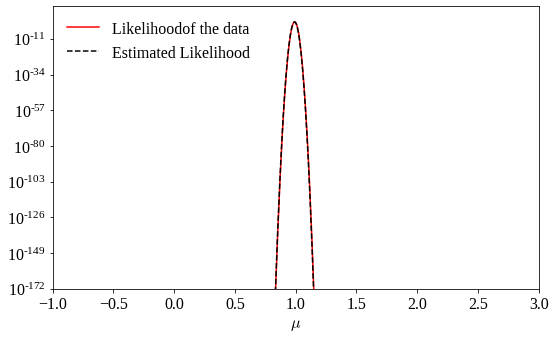

In [52]:
#second order differentiation
diff = np.diff(np.log(L_tot), 2)                     #delta logL^2
norm = ((np.max(mu_v)-np.min(mu_v))/len(mu_v))**2    #delta theta^2

#sigma estimate
sigma_est = (-diff[np.argmax(L_tot)]/norm)**(-1/2)
print('Numerical maximum likelihood error:', sigma_est)
print('Analytical maximum likelihood error:', np.sum(sigma_v**(-2))**(-1/2))

#draw
plt.plot(mu_v, L_tot/np.max(L_tot), color='tab:red', label= 'Likelihoodof the data')
plt.plot(mu_v, L(mu_v, mu_v[int(np.argmax(L_tot))], sigma_est)/np.max(L(mu_v, mu_v[int(np.argmax(L_tot))], sigma_est)), color='black', label='Estimated Likelihood', linestyle='--')
plt.yscale('log')
plt.legend(frameon=False, loc='upper left')
plt.xlabel(r'$\mu$')
plt.xlim([-1, 3])
plt.ylim([1e-172, 1e10])